### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

#%run Visualizer.py # --allows for reloading the particular code

#### Train the network

In [ ]:
n = 10
popsize = 10
generations = 20
wrap_around = True
name = 'centered8'
#device = torch.device('mps:0')
device = torch.device('cpu')
#trainer = Evo_Trainer(n, device)
trainer = Evo_Trainer(n, device, popsize)

2023-02-21 22:39:53,551	INFO worker.py:1528 -- Started a local Ray instance.


[2023-02-21 22:39:55] INFO     <40464> evotorch.core: Instance of `Custom_NEProblem` (id:11222715696) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-02-21 22:39:55] INFO     <40464> evotorch.core: Instance of `Custom_NEProblem` (id:11222715696) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-02-21 22:39:55] INFO     <40464> evotorch.core: Instance of `Custom_NEProblem` (id:11222715696) -- The `device` of the problem is set as cpu
[2023-02-21 22:39:55] INFO     <40464> evotorch.core: Instance of `Custom_NEProblem` (id:11222715696) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-02-21 22:39:55] INFO     <40464> evotorch.core: Instance of `Custom_NEProblem` (id:11222715696) -- Number of GPUs that will be allocated per actor is None


In [ ]:
trainer.train(generations, name)

              iter : 1
obj0_pop_best_eval : 4.0
  obj0_median_eval : 0.0
    obj0_mean_eval : 0.26499998569488525
obj1_pop_best_eval : 0.0
  obj1_median_eval : 0.0
    obj1_mean_eval : 0.0
obj2_pop_best_eval : 2.0
  obj2_median_eval : 0.0
    obj2_mean_eval : 0.22499999403953552
obj3_pop_best_eval : 100.0
  obj3_median_eval : 100.0
    obj3_mean_eval : 100.0
obj4_pop_best_eval : 1.9759999513626099
  obj4_median_eval : 0.39399999380111694
    obj4_mean_eval : 0.48017996549606323
obj5_pop_best_eval : 0.0
  obj5_median_eval : 6.137068748474121
    obj5_mean_eval : 7.794261455535889

              iter : 2
obj0_pop_best_eval : 4.0
  obj0_median_eval : 0.0
    obj0_mean_eval : 0.2849999964237213
obj1_pop_best_eval : 0.0
  obj1_median_eval : 0.0
    obj1_mean_eval : 0.0
obj2_pop_best_eval : 2.0
  obj2_median_eval : 0.0
    obj2_mean_eval : 0.26499998569488525
obj3_pop_best_eval : 100.0
  obj3_median_eval : 100.0
    obj3_mean_eval : 100.0
obj4_pop_best_eval : 1.621999979019165
  obj4_median_

In [ ]:
network = trainer.get_trained_network()

In [ ]:
network = trainer.problem.parameterize_net(trainer.searcher.status['best'][0])
#network = trainer.problem.parameterize_net(trainer.searcher.status['center'][0])

#### Visualize trained network

In [ ]:
organism = generate_organism(n, device)
graph = organism.toGraph()
visualizer = Visualizer(wrap_around)
network(graph, 0)

(Data(x=[30, 10], edge_index=[1, 0], device=cpu, attr=[1]),
 tensor([0., 0.]),
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0)

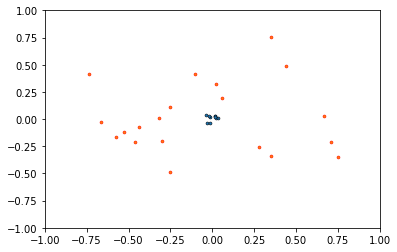

In [ ]:
anim = visualizer.animate_organism(graph, network, food=30, frames=100)
visualizer.save_animation_to_gif(anim, name, 10)

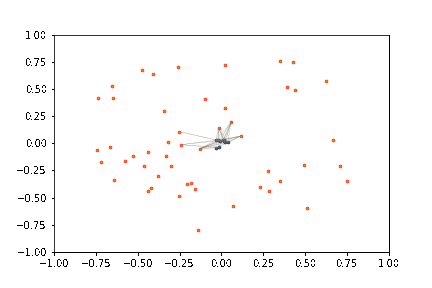

In [ ]:
Image('../animation/' + name + '.gif')

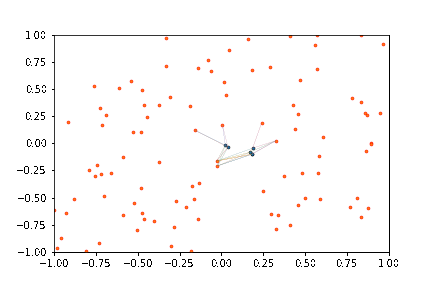

In [ ]:
Image('../animation/GATConv1.gif')

In [ ]:
anim.frame_seq = anim.new_saved_frame_seq() 
IPython.display.HTML(anim.to_jshtml())

In [ ]:
print(network)

CGConv1(
  (conv_layer_cells): CGConv(16, dim=4)
  (conv_layer_food): CGConv(16, dim=4)
  (mlp_before): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
  )
  (mlp_middle): Sequential(
    (0): ReLU()
    (1): Linear(in_features=32, out_features=16, bias=True)
    (2): ReLU()
  )
  (mlp): Sequential(
    (0): ReLU()
    (1): Linear(in_features=16, out_features=8, bias=True)
    (2): ReLU()
    (3): Linear(in_features=8, out_features=4, bias=True)
    (4): ReLU()
    (5): Linear(in_features=4, out_features=2, bias=True)
    (6): Tanh()
  )
  (gConvGRU): GConvGRU(
    (conv_x_z): ChebConv(16, 16, K=1, normalization=sym)
    (conv_h_z): ChebConv(16, 16, K=1, normalization=sym)
    (conv_x_r): ChebConv(16, 16, K=1, normalization=sym)
    (conv_h_r): ChebConv(16, 16, K=1, normalization=sym)
    (conv_x_h): ChebConv(16, 16, K=1, normalization=sym)
    (conv_h_h): ChebConv(16, 16, K

In [ ]:
print('conv_layers1: ', network.conv_layer_cells)
for param in network.conv_layer_cells.parameters():
  print(param.data)

print('conv_layers2: ', network.conv_layer_food)
for param in network.conv_layer_food.parameters():
  print(param.data)

conv_layers1:  CGConv(16, dim=4)
tensor([[-7.1392e-02,  7.1999e-02, -7.0126e-02, -2.7506e-02,  3.9537e-02,
         -1.6328e-01,  1.9525e-02,  1.2318e-02,  1.5649e-01,  1.2330e-01,
          3.3058e-02,  9.3292e-02, -6.4549e-02,  1.0606e-01,  1.4206e-02,
         -1.5866e-02, -2.9853e-02, -1.1280e-01,  4.3219e-02,  1.7702e-01,
          5.2400e-02,  4.5120e-02,  2.0397e-02, -2.0850e-02,  1.9253e-01,
         -1.5971e-02, -4.9785e-02,  4.5399e-02, -1.1237e-01, -2.9145e-03,
          1.3980e-01,  1.4523e-01, -3.6559e-02,  3.5460e-02, -2.8612e-02,
          9.1332e-02],
        [ 6.4851e-02,  9.2980e-02,  6.4596e-02, -5.0947e-02, -2.8282e-02,
         -5.4621e-02,  3.8101e-02,  6.1552e-02, -2.2650e-02, -2.2735e-02,
          5.4034e-02, -1.9712e-02, -6.0946e-03,  6.8482e-03,  5.0453e-02,
          9.7467e-02, -3.7861e-02, -2.5421e-02,  8.6370e-02,  2.0277e-01,
          4.9506e-02, -2.4026e-02,  1.1685e-01,  9.1879e-02,  9.9260e-02,
         -2.2218e-01,  3.9159e-02,  5.8480e-02, -3.2369e

In [ ]:
print('GConvGRU: ', network.gConvGRU)
for param in network.gConvGRU.parameters():
  print(param.data)


GConvGRU:  GConvGRU(
  (conv_x_z): ChebConv(16, 16, K=1, normalization=sym)
  (conv_h_z): ChebConv(16, 16, K=1, normalization=sym)
  (conv_x_r): ChebConv(16, 16, K=1, normalization=sym)
  (conv_h_r): ChebConv(16, 16, K=1, normalization=sym)
  (conv_x_h): ChebConv(16, 16, K=1, normalization=sym)
  (conv_h_h): ChebConv(16, 16, K=1, normalization=sym)
)
tensor([-0.1031,  0.0638,  0.0789, -0.0834, -0.0262, -0.1235, -0.0522, -0.0025,
         0.0408,  0.0290,  0.1537,  0.0077, -0.0011,  0.1220, -0.0101,  0.0244])
tensor([[ 1.8021e-01,  5.6047e-02, -9.9475e-02,  6.4243e-02,  6.6354e-02,
         -7.5003e-02, -4.8212e-02,  3.4359e-02,  6.0495e-02,  1.7697e-03,
          1.2067e-01,  1.0614e-01, -3.7624e-02,  9.7592e-02, -1.2354e-01,
         -2.9912e-02],
        [ 8.9693e-02,  2.9956e-03, -1.1092e-01,  3.9264e-02, -3.2112e-02,
         -2.8788e-02,  1.1248e-01,  1.0042e-01, -1.2487e-01, -1.0993e-02,
          2.1731e-02, -5.0707e-02, -4.3536e-02, -9.2164e-02, -1.0053e-01,
         -4.5252e-0

In [ ]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

#### Visualization of loss:

In [ ]:
import matplotlib.pyplot as plt
losses = trainer.logger_df
print(losses)
#plt.plot(losses.stepsize)

#plt.plot(losses.median_eval)
#plt.plot(losses.pop_best_eval)
#plt.plot(losses.mean_eval)
#plt.legend(('median_eval', 'pop_best_eval', 'mean eval'))
plt.show()

      obj0_pop_best_eval  obj0_median_eval  obj0_mean_eval  \
iter                                                         
1                    4.0               0.0           0.265   
2                    4.0               0.0           0.285   
3                    4.0               0.0           0.390   
4                    4.0               0.0           0.330   
5                    4.0               0.0           0.420   
6                    9.0               0.0           0.400   
7                    4.0               0.0           0.365   
8                    4.0               0.0           0.360   
9                    9.0               0.0           0.455   
10                   4.0               0.0           0.390   
11                   9.0               0.0           0.435   
12                   4.0               0.0           0.410   
13                   4.0               0.0           0.370   
14                  16.0               0.0           0.465   
15      